In [1]:
from natsort import natsorted, ns
import pickle
import csv
import numpy as np
from load_mol2_data import *
import os
from math import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
def norm_data(data):
    result = []
    for i in data:
        result.append((float(i)-min(data))/(max(data)-min(data)))
    return result

In [3]:
"""


The Hamiltonian construction:

H =     [ E620  J       J       J   ]
        [       E610    J       J   ]
        [               E611    J   ]
        [                       E612]

        

"""

'\n\n\nThe Hamiltonian construction:\n\nH =     [ E620  J       J       J   ]\n        [       E610    J       J   ]\n        [               E611    J   ]\n        [                       E612]\n\n        \n\n'

In [11]:
data = np.load('Hamiltonian_result.npy')
data.shape
data[1]

array([[ 1.49000000e+04, -7.03970307e+00,  3.85297494e+00,
        -1.04939758e+01],
       [ 0.00000000e+00,  1.49000000e+04, -2.15587932e+01,
         1.99657970e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.49000000e+04,
         1.04103232e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.49000000e+04]])

In [5]:
mirror = []
for points in data:
    points = points + points.T - np.diag(np.diag(points))
    mirror.append(points)
mirror[1]

array([[ 1.49000000e+04, -7.03970307e+00,  3.85297494e+00,
        -1.04939758e+01],
       [-7.03970307e+00,  1.49000000e+04, -2.15587932e+01,
         1.99657970e+01],
       [ 3.85297494e+00, -2.15587932e+01,  1.49000000e+04,
         1.04103232e+02],
       [-1.04939758e+01,  1.99657970e+01,  1.04103232e+02,
         1.49000000e+04]])

In [6]:
a = np.linalg.eig(mirror[0])
print(len(a[0]),len(a[1][0]))

4 4


In [12]:
a[1]

array([[-0.06396518, -0.78336836,  0.61809483, -0.01418598],
       [ 0.2202078 , -0.61419556, -0.75661361, -0.04252277],
       [ 0.69108664,  0.03532608,  0.13257774,  0.70962981],
       [-0.68543142, -0.08859963, -0.1670861 ,  0.70314729]])

In [8]:
a[0]

array([14773.5939452 , 14890.45764648, 14916.61862449, 15019.32978384])

In [9]:
J620_610 = data[:,0,1]
J620_611 = data[:,0,2]
J620_612 = data[:,0,3]
J610_611 = data[:,1,2]
J610_612 = data[:,1,3]
J611_612 = data[:,2,3]


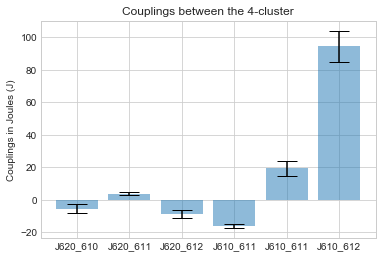

In [15]:
couplings = ["J620_610","J620_611","J620_612","J610_611","J610_611","J610_612","J611_612"]

x_pos = np.arange(1,len(couplings))
CTEs = [np.mean(J620_610),np.mean(J620_611),np.mean(J620_612),np.mean(J610_611),np.mean(J610_612),np.mean(J611_612)]
error = [np.std(J620_610),np.std(J620_611),np.std(J620_612),np.std(J610_611),np.std(J610_612),np.std(J611_612)]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Couplings in Joules (J)')
ax.set_xticks(x_pos)
ax.set_xticklabels(couplings)
ax.set_title('Couplings between the 4-cluster')
ax.yaxis.grid(True)


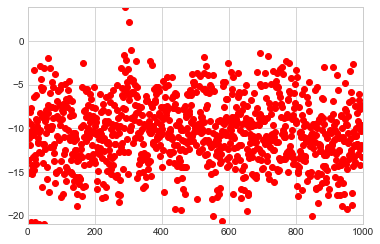

In [6]:
#This is sum

coupling_sum = np.add(data[:,0,1],data[:,0,2])
coupling_sum = np.add(coupling_sum,data[:,0,3])


plt.plot(np.arange(0,1000), coupling_sum, 'ro')
plt.axis([0, 1000, min(coupling_sum), max(coupling_sum)])
plt.show()


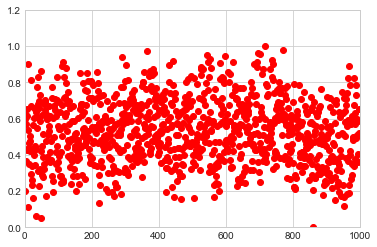

In [7]:
plt.plot(np.arange(0,1000), norm_data(data[:,0,1]), 'ro')
plt.axis([0, 1000, 0, 1.2])
plt.show()


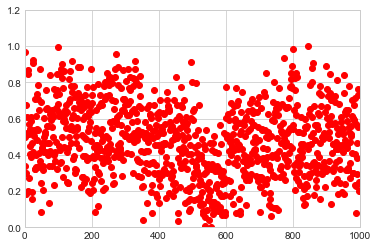

In [8]:
plt.plot(np.arange(0,1000), norm_data(data[:,0,2]), 'ro')
plt.axis([0, 1000, 0, 1.2])
plt.show()


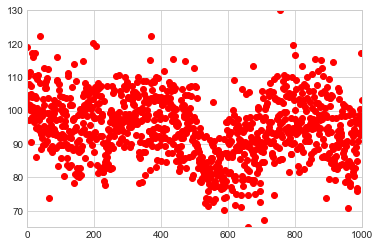

In [45]:
plt.plot(np.arange(0,1000), data[:,2,3], 'ro')
plt.axis([0, 1000, min(data[:,2,3]), max(data[:,2,3])])
plt.show()
